<h1 align="center"><font color = #119fbf>Detecção de Fraude de Cartão de Crédito</font></h1>

### Problema de Negócio

**Contexto** 
Um ponto de extrema importância para empresas de cartão de crédito é a capacidade de reconhecer transações fraudulentas para que os clintes não sejam cobrados por itens que não compraram. Sabendo disso, neste projeto serão utilizados algoritimos de Machine Learning para detectar transações de créditos fraudulentas.

**Dataset** 
[Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

**Sobre o conjunto de dados**
O conjunto de dados contém transações feitas por cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações ocorridas em dois dias, onde temos **492 fraudes em 284.807 transações**. O conjunto de dados é altamente desbalanceado, a classe positiva (fraudes) responde por 0,172% de todas as transações.

As variáveis de entrada **numéricas** são o resultado de uma **transformação PCA**. Devido a questões de confidencialidade, não são fornecidos os recursos originais sobre os dados. As características V1, V2, … V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Time' e 'Amount'. O recurso 'Time' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O recurso 'Amount' é o valor da transação. A característica 'Classe' é a variável de resposta e assume **valor 1 em caso de fraude e 0 caso contrário**.

<!-- (Dada a taxa de desequilíbrio de classe, é recomendado medir a precisão usando a Área sob a Curva de Rechamada de Precisão (AUPRC). A precisão da matriz de confusão não é significativa para a classificação desbalanceada.-->

**Importações**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Análise Exploratória dos Dados

In [125]:
!pip install opendatasets

     ---------------------------------------- 63.3/63.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77731 sha256=4e5d35dee321bcef12ef78ba61d168a8c4f1b537436eb36e93f54a73a8710922
  Stored in directory: c:\users\andre\appdata\local\pip\cache\wheels\1b\22\79\e73b3e988388377c1cda3385bfa20c1799be101c2e12bbe3dc
Successfully built kaggle


In [127]:
import opendatasets as od
#od.download('https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud')

In [128]:
df = pd.read_csv('../dataset/creditcard.csv', sep=',')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Informações sobre o DataFrame**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Estatísticas Descritivas**

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Valores Nulos**

In [11]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Valores duplicados**

In [21]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

**Verificando a ocorrência de transações fraudulentas e não fraudulentas**

In [50]:
class_copy = {0: '0 - Não Fraudulenta', 1: '1- Fraudulentas'}

df_copy = df.copy()
df_copy['Class'] = df_copy['Class'].replace(class_copy)
df_copy['Class'].value_counts()

0 - Não Fraudulenta    284315
1- Fraudulentas           492
Name: Class, dtype: int64

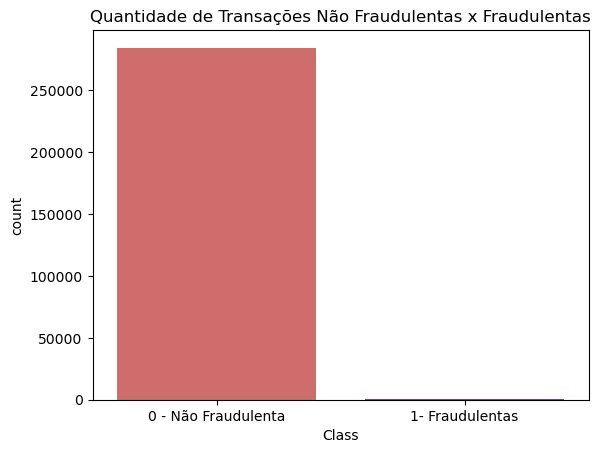

In [48]:
sns.countplot(x='Class', data=df_copy, palette="flare",)
plt.title('Quantidade de Transações Não Fraudulentas x Fraudulentas');

**Verificando a correlação entre as variáveis**

In [119]:
df.corr()['Class'].sort_values(ascending=False)


Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

In [118]:
s = df.corr()['Class'].sort_values(ascending=False)
dfs = s.to_frame()
dfs.T

,Class,V11,V4,V2,V21,V19,V20,V8,V27,V28,...,V9,V1,V18,V7,V3,V16,V10,V12,V14,V17
Class,1.0,0.154876,0.133447,0.091289,0.040413,0.034783,0.02009,0.019875,0.01758,0.009536,...,-0.097733,-0.101347,-0.111485,-0.187257,-0.192961,-0.196539,-0.216883,-0.260593,-0.302544,-0.326481


<Axes: >

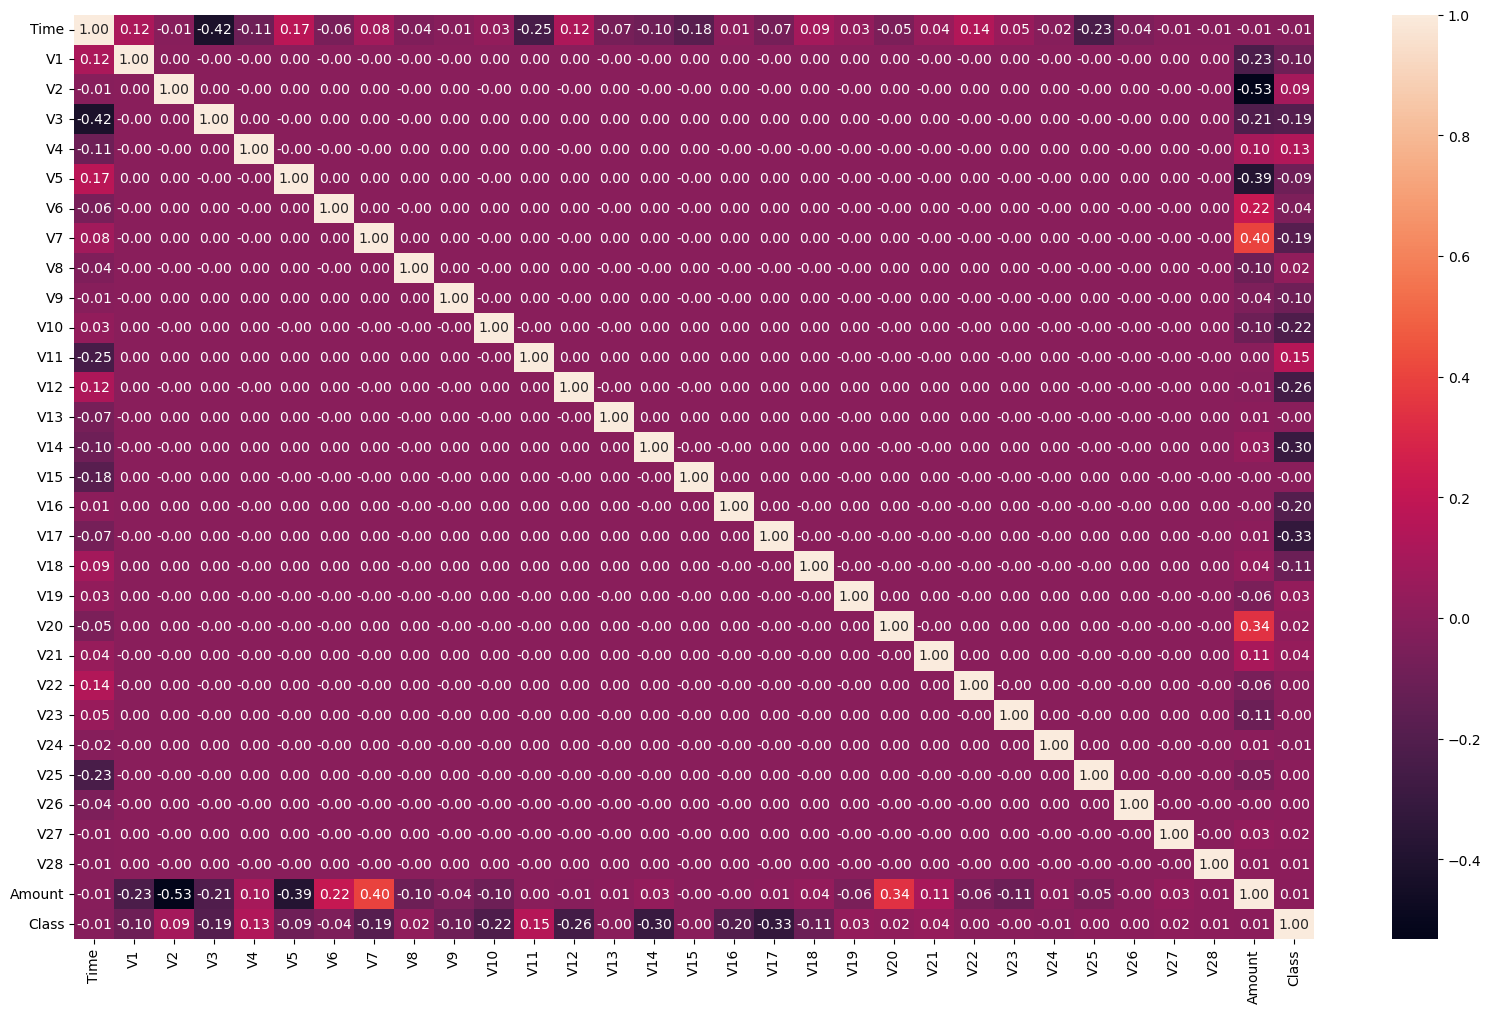

In [66]:
plt.subplots(figsize = (20,12))
sns.heatmap(df.corr(), annot = True, fmt=".2f")

**Análise das distribuições - Tempo e Valor**

Text(0.5, 1.0, 'Distribuição do Tempo')

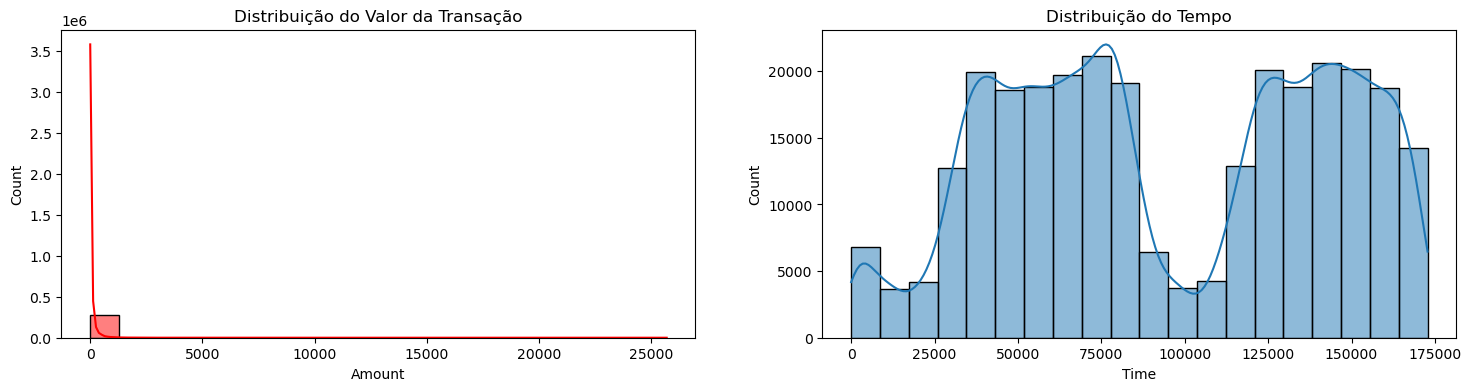

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(18,4))

sns.histplot(data=df, x='Amount', kde=True, bins=20, ax=axs[0], color='r').set_title("Distribuição do Valor da Transação")
sns.histplot(data=df, x='Time', kde=True,  ax=axs[1], bins=20).set_title("Distribuição do Tempo")

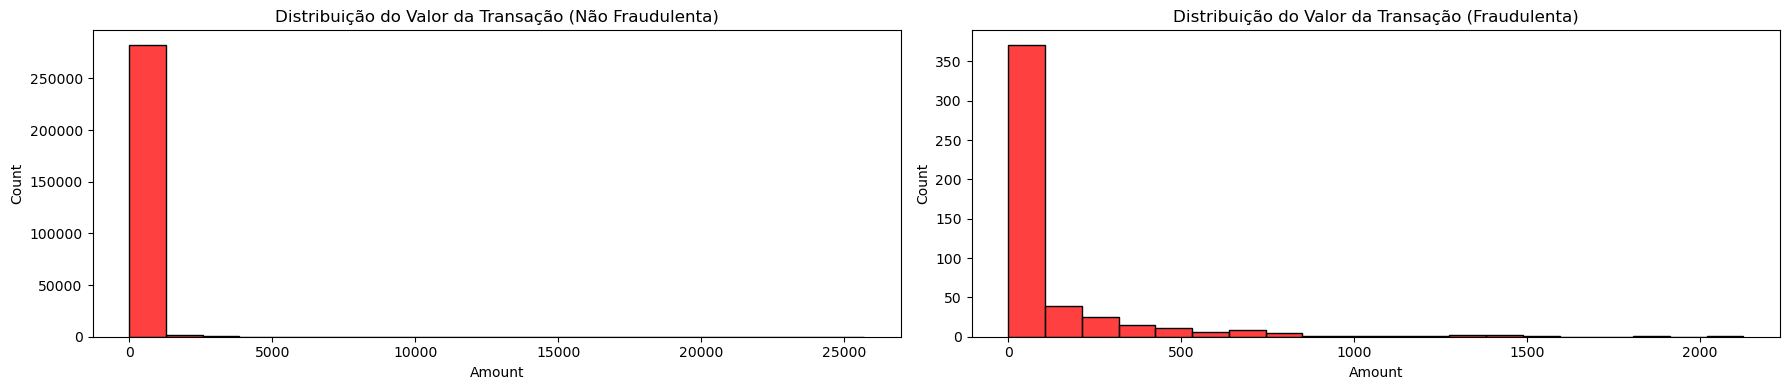

In [123]:
df_normal = df[df['Class'] == 0]
df_fraude = df[df['Class'] == 1] 

#fig, axs = plt.subplots(2, 1)
fig, axs = plt.subplots(1, 2, figsize=(18,4))

sns.histplot(data=df_normal, x='Amount', kde=False, bins=20, color='r',  ax=axs[0]).set_title("Distribuição do Valor da Transação (Não Fraudulenta)");
sns.histplot(data=df_fraude, x='Amount', kde=False, bins=20, color='r',  ax=axs[1]).set_title("Distribuição do Valor da Transação (Fraudulenta)");

plt.tight_layout()
plt.show()


-> 1 gráfico de barras anotado

-> 2 gráfico de correlção completo 

-> 3 pandas profiling 

<!--
1 
plt.figure(figsize=(8, 6)) 
plot = sns.countplot(x="Class", data=df) 
  
for p in plot.patches: 
    plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', xytext=(0, 9), 
                   textcoords='offset points') 
      
#plt.ylabel("Average Age", size=14) 
#plt.xlabel("Ticket Class", size=14) 
plt.title("Grouped Barplot with annotations", size=18) 

2
corr = df.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, mask=mask, robust=True)

3
!pip install pandas-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_widgets()
-->